In [3]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment6.ipynb")

# k-Nearest Neighbors, Decision Trees, and Random Forests

In this assignment, you'll explore Decision Trees and Random Forests using the sklearn library. Follow the instructions, run all the cells, and submit the completed notebook via Gradescope.

For multiple choice questions, make sure to only include your final answer. For all code set `random_state=42`.

Throughout the assignment, you'll learn how to:

- Build a Decision Tree
- Compute the Gini index
- Construct a Random Forest and adjust its parameters to optimize performance

Let's begin by loading the necessary libraries and dataset.


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load a dataset (Iris dataset)
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Show dataset features and labels
print("Features:", data.feature_names)
print("Labels:", data.target_names)


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels: ['setosa' 'versicolor' 'virginica']


<!-- BEGIN QUESTION -->

#### 1. What is the primary difference between classification and regression problems?

        A) Classification predicts continuous values, and regression predicts categories.
        B) Classification predicts categories, and regression predicts continuous values.
        C) Both are used to predict categories.
        D) Both are used to predict numeric values.

In [5]:
def ans1():
    return B

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### What is the purpose of the "splitting criterion" in a decision tree?

        A) To evaluate when to stop splitting
        B) To determine the optimal depth of the tree
        C) To select the best feature to split on
        D) To calculate the number of leaves

In [6]:
def ans2():
    return C

<!-- END QUESTION -->


### 3. Building a Decision Tree


#### 3. Building a Decision Tree:
Create a Decision Tree and make sure the accuracy is above 90%. Also print out the tree with export_text(). Make sure to set the `random_state`.

In [7]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Build a decision tree classifier Set (random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# Display the tree structure
tree_structure = export_text(tree_clf)
print(tree_structure)


Decision Tree Accuracy: 0.91
|--- feature_2 <= 2.35
|   |--- class: 0
|--- feature_2 >  2.35
|   |--- feature_2 <= 5.05
|   |   |--- feature_3 <= 1.60
|   |   |   |--- feature_1 <= 2.25
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  2.25
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  1.60
|   |   |   |--- feature_1 <= 2.90
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  2.90
|   |   |   |   |--- class: 1
|   |--- feature_2 >  5.05
|   |   |--- feature_2 <= 5.15
|   |   |   |--- feature_1 <= 2.75
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.75
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  5.15
|   |   |   |--- class: 2



In [8]:
grader.check("q3")

q3 results: All test cases passed!


#### 4. Implement Gini Index

Let's manually compute the Gini index for one of the splits in the decision tree.

Here is a description of Gini index from the [lecture notes](https://tools4ds.github.io/DS701-Course-Notes/14-Classification-I-Decision-Trees.html#impurity-measures)


In [9]:
# Function to calculate Gini Index
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        group_size = float(len(group))
        if group_size != 0:
            # Convert group to NumPy array so we can use NumPy indexing
            group = np.array(group)
            # Calculate the proportion of each class in the group
            proportions = [len(group[np.where(group[:, -1] == class_)[0]]) / group_size for class_ in classes]
            # Calculate the Gini impurity for the group
            group_gini = 1 - sum([p**2 for p in proportions])
            # Add the weighted Gini impurity to the total Gini index
            gini += group_size / n_instances * group_gini

    return gini

# Example: Manually splitting data based on feature 0 (sepal length) with threshold 5.5
def test_split(index, value, dataset):
    left, right = [], []
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

# Combine X and y into a dataset
dataset = np.column_stack((X_train, y_train))

# Test split
left_group, right_group = test_split(0, 5.5, dataset)

# Calculate Gini index for the split
gini = gini_index([left_group, right_group], np.unique(y_train))
print(f"Gini Index for the split: {gini:.3f}")


Gini Index for the split: 0.466


In [10]:
grader.check("q4")

q4 results: All test cases passed!

#### 5. Prevent Overfitting.

Overfitting happens when the model learns the training data too well, including the noise, which results in poor performance on unseen data. Random Forests can also overfit, especially if the trees are too deep or there are too many trees.

To prevent overfitting, we can:
- Limit the depth of each tree (`max_depth`).
- Reduce the number of trees (`n_estimators`).
- Increase the minimum number of samples required to split a node (`min_samples_split`).
- Increase the minimum number of samples required to be at a leaf node (`min_samples_leaf`).
- Use cross-validation to monitor the model's performance.

Tweak the parameters of the Random Forest to prevent overfitting. The accuracy should be less than 95% & above 80%. Make sure you use `random_state`

In [11]:
# Place the right one
# Set (random_state=42)
rf_clf_tuned = RandomForestClassifier(
    n_estimators=100,            # Number of trees in the forest
    max_depth=10,                 # Limit the depth of each tree
    min_samples_split=10,        # Minimum number of samples required to split a node
    min_samples_leaf=20,          # Minimum number of samples required at a leaf node
    random_state=42              # Set random state for reproducibility
)

# Traint he Random Forest model on the training data
rf_clf_tuned.fit(X_train, y_train)

# If accuracy too high, reduce max_depth or increase min_samples_split and min_samples_leaf
# If accuracy too low, increase max_depth or reduce min_samples_split and min_samples_leaf

# Predict and calculate accuracy for the tuned model
y_pred_rf_tuned = rf_clf_tuned.predict(X_test)
rf_accuracy_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Tuned Random Forest Accuracy: {rf_accuracy_tuned:.2f}")

Tuned Random Forest Accuracy: 0.84


In [12]:
grader.check("q5")

q5 results: All test cases passed!

<!-- BEGIN QUESTION -->

#### 6. Interpretability with Decision Trees 

The decision tree is easy to interpret. Write code through the export_graphviz that can create an image to explain the decision tree.

You can refer to the given image provided.


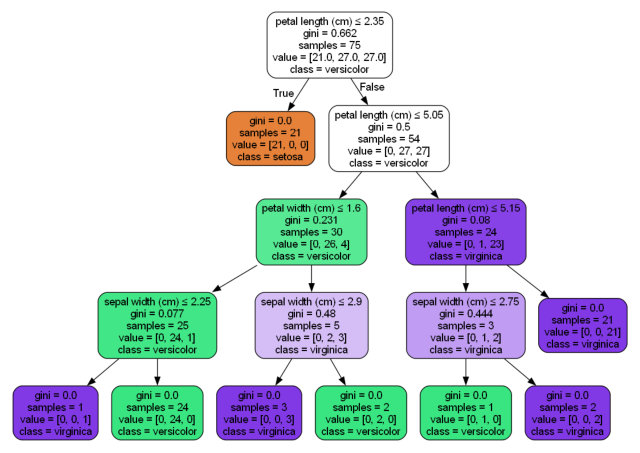

In [13]:
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Generate a DOT file for the decision tree
dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=data.feature_names,  
                           class_names=data.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True) 

# Convert DOT data to a graph
graph = graphviz.Source(dot_data)

# Save the graph as a PNG file
graph.render("decision_tree", format="png")


# Read the image file and display it using matplotlib
img = mpimg.imread("decision_tree.png")
plt.figure(figsize=(8, 17))
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
grader.check("q6")

q6 results: All test cases passed!

<!-- END QUESTION -->

#### 7. Interpretability with kNN? 

It can be somewhat difficult to __understand__ why $k$-NN is making a specific prediction. It depends on the data in the neighborhood of the test point.

Let us build a K-NN. Do the following:
- Scale the features
- Build the k-NN with 5 neighbors
- Print the confusion matrix

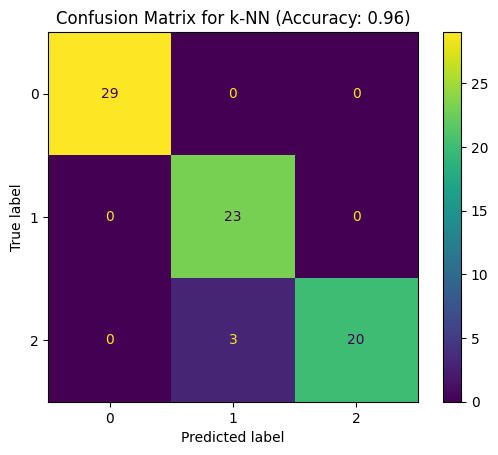

Accuracy: 0.96


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Standardize the features, X_train_scaled, and X_test_scaled
data = load_iris()
X = data.data
y = data.target #df is your dataframe
#frac is percentage of data to sample
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the KNN model Set (random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test)
plt.title(f'Confusion Matrix for k-NN (Accuracy: {accuracy:.2f})')
plt.show()

print(f"Accuracy: {accuracy:.2f}")



In [22]:
grader.check("q7")

q7 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [23]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

C:\Users\danst\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\otter\check\notebook.py:470: UserWarning: Could not locate a PDF to include
  warnings.warn("Could not locate a PDF to include")


PandocMissing: Pandoc wasn't found.
Please check that pandoc is installed:
https://pandoc.org/installing.html